### Project idea: to find and show the solar/renewable energy incentives in the United States (offered by the states and federal governments). The data will be extracted from Database of State Incentives for Renewable & Efficiency and tesla information page.

## Part 1 Web scraping 
### www.dsireusa.org  Database of State Incentives for Renewable & Efficiency
### 1. Selenium 2. BeautifulSoup

## www.tesla.com/support/incentives?redirect=no Electric Vehicle & Solar Incentives 
### 1. Selenium

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)

url = "https://www.dsireusa.org/"
driver.get(url)

time.sleep(1.5)

body = driver.find_element_by_css_selector("body")
html_text = body.get_attribute("innerHTML")
#print(html_text)
bs = BeautifulSoup(html_text, 'html.parser')
htmlList =[]
for l in bs.find_all('li'):
    htmlList.append(l.text)
print(htmlList[37:96]) # Number of state policies and incentives by state, including U.S. territories


['AL - Alabama 19', 'AK - Alaska 16', 'AS - American Samoa 1', 'AZ - Arizona 58', 'AR - Arkansas 26', 'CA - California 148', 'CO - Colorado 95', 'CT - Connecticut 49', 'DE - Delaware 25', 'DC - District of Columbia 15', 'US - Federal 28', 'FM - Federated States of Micronesia 1', 'FL - Florida 72', 'GA - Georgia 36', 'GU - Guam 3', 'HI - Hawaii 28', 'ID - Idaho 30', 'IL - Illinois 64', 'IN - Indiana 57', 'IA - Iowa 47', 'KS - Kansas 12', 'KY - Kentucky 39', 'LA - Louisiana 20', 'ME - Maine 20', 'MD - Maryland 72', 'MA - Massachusetts 71', 'MI - Michigan 45', 'MN - Minnesota 134', 'MS - Mississippi 20', 'MO - Missouri 60', 'MT - Montana 27', 'MP - N. Mariana Islands 3', 'NE - Nebraska 18', 'NV - Nevada 29', 'NH - New Hampshire 39', 'NJ - New Jersey 46', 'NM - New Mexico 38', 'NY - New York 96', 'NC - North Carolina 68', 'ND - North Dakota 14', 'OH - Ohio 46', 'OK - Oklahoma 29', 'OR - Oregon 101', 'PW - Palau 1', 'PA - Pennsylvania 52', 'PR - Puerto Rico 14', 'RI - Rhode Island 28', 'SC 

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)

url = "https://www.tesla.com/support/incentives?redirect=no"
driver.get(url)

time.sleep(1.5)

# Federal incentive table - creating a list
rows = len(driver.find_elements_by_xpath("//div[2]/div/div/table[1]/tbody/tr"))
cols = len(driver.find_elements_by_xpath("//div[2]/div/div/table[1]/tbody/tr[1]/td"))

tesList =[]
for r in range(2,rows+1):
    for c in range(1,cols+1):
        value=driver.find_element_by_xpath("//div[2]/div/div/table[1]/tbody/tr["+str(r)+"]/td["+str(c)+"]").text
        tesList.append(value)
print(tesList)
print("\n\n")

# State incentive table - creating a dictionary
rows1 = len(driver.find_elements_by_xpath("//div[2]/div/div/table[3]/tbody/tr"))
cols1 = len(driver.find_elements_by_xpath("//div[2]/div/div/table[3]/tbody/tr[2]/td"))

tesDict = {}
for ro in range(2,rows1+1):
    for co in range(1,cols1+1):
        key = driver.find_element_by_xpath("//div[2]/div/div/table[3]/tbody/tr["+str(ro)+"]/td[1]").text
        val = driver.find_element_by_xpath("//div[2]/div/div/table[3]/tbody/tr["+str(ro)+"]/td["+str(co)+"]").text
        tesDict[key] = val
print(tesDict)
print("\n\n")

# State local incentive table - creating a dictionary
rows2 = len(driver.find_elements_by_xpath("//div[2]/div/div/table[5]/tbody/tr"))
cols2 = len(driver.find_elements_by_xpath("//div[2]/div/div/table[5]/tbody/tr[2]/td"))
tesDict1 = {}
for ro in range(2,rows2+1):
    for co in range(1,cols2+1):
        if ro != 7:
            key = driver.find_element_by_xpath("//div[2]/div/div/table[5]/tbody/tr["+str(ro)+"]/td[1]/strong").text
            val = driver.find_element_by_xpath("//div[2]/div/div/table[5]/tbody/tr["+str(ro)+"]/td["+str(co)+"]").text
            tesDict1[key] = val
print(tesDict1)

['26%', '26%', 'January 1 to December 31, 2020', '22%', '22%', 'January 1 to December 31, 2021', '0%', '10%', 'On or after January, 2022']



{'All states': '26% federal income tax credit (subject to phase out schedule above)', 'Arizona': 'Solar: Up to $1,000 state tax credit', 'California': 'Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)', 'Colorado': 'Select utilities may offer a Solar incentive', 'Connecticut': 'Solar: Up to $300 per kW PTC', 'Delaware': 'Select utilities may offer a Solar incentive', 'Florida': ' ', 'Hawaii': 'Solar: State tax credit equal to the lesser of 35% of actual system cost or $5,000 per 5 kW', 'Idaho': ' ', 'Illinois': 'Earn $1,000 per kW off the cash or loan price of solar panels, and $860 per kW off the cash or loan price of Solar Roof by trading your Solar Renewable Energy Credits (SREC)', 'Louisiana': ' ', 'Maine': ' ', 'Maryland': 'Solar: $1,000 per system\nSolar: Earn $170 per kW off t

# Part 2 NumPy and Pandas
### NumPy: 1. Creating ndarray    2. Datatypes for ndarray    3. Sorting <br>
### Pandas: 1. Series    2. DataFrame    3. Arithmetic

In [16]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Preparing the list of the solar policie numbers by state to create ndarray 
newList = htmlList[37:96]
arrList = []
for i in newList:
    arrList.append(i.strip().split(" "))

for j in arrList:
    j.pop(1)

tList =[]
usMapList =[]
for l in arrList:
    if len(l) == 4:
        l[1 : 3] = [' '.join(l[1: 3])]
    if len(l) == 5:
        l[1 : 4] = [' '.join(l[1: 4])]
    if len(l) == 6:
        l[1 : 5] = [' '.join(l[1: 5])]
    usMapList.append(tuple(l))
#print(usMapList)
for k in arrList:
    if len(k) == 4:
        k[1 : 3] = [''.join(k[1: 3])]
    if len(k) == 5:
        k[1 : 4] = [''.join(k[1: 4])]
    if len(k) == 6:
        k[1 : 5] = [''.join(k[1: 5])]
    tList.append(tuple(k))
print(tList)
print("\n\n")

# Preparing the list of the solar policie numbers by state to create ndarray
new_lst = []
sublist = []
for element in tesList:
    if "Jan" not in element:
        sublist.append(element)
    else:
        sublist.append(element)
        new_lst.append(sublist)
        sublist = []

if sublist: # add the last sublist
    new_lst.append(sublist)

result = []
for s in new_lst:
    result.append(tuple(s))
print(result)

[('AL', 'Alabama', '19'), ('AK', 'Alaska', '16'), ('AS', 'American Samoa', '1'), ('AZ', 'Arizona', '58'), ('AR', 'Arkansas', '26'), ('CA', 'California', '148'), ('CO', 'Colorado', '95'), ('CT', 'Connecticut', '49'), ('DE', 'Delaware', '25'), ('DC', 'District of Columbia', '15'), ('US', 'Federal', '28'), ('FM', 'Federated States of Micronesia', '1'), ('FL', 'Florida', '72'), ('GA', 'Georgia', '36'), ('GU', 'Guam', '3'), ('HI', 'Hawaii', '28'), ('ID', 'Idaho', '30'), ('IL', 'Illinois', '64'), ('IN', 'Indiana', '57'), ('IA', 'Iowa', '47'), ('KS', 'Kansas', '12'), ('KY', 'Kentucky', '39'), ('LA', 'Louisiana', '20'), ('ME', 'Maine', '20'), ('MD', 'Maryland', '72'), ('MA', 'Massachusetts', '71'), ('MI', 'Michigan', '45'), ('MN', 'Minnesota', '134'), ('MS', 'Mississippi', '20'), ('MO', 'Missouri', '60'), ('MT', 'Montana', '27'), ('MP', 'N. Mariana Islands', '3'), ('NE', 'Nebraska', '18'), ('NV', 'Nevada', '29'), ('NH', 'New Hampshire', '39'), ('NJ', 'New Jersey', '46'), ('NM', 'New Mexico', '

In [5]:
import numpy as np

# NumPy datatypes for ndarray
data_type = [('Abr', 'S15'),('State/US Territories', 'S30'), ('NumberOfPolicies', int)] 
# NumPy creating ndarray
statePolicies = np.array(tList, dtype=data_type) 
print(statePolicies)
print("\n\n")

# NumPy datatypes for ndarray
data_typeTes=[('Residential Federal Tax Credit','S15'),('Business Federal Tax Credit','S15'),('For Systems Installed','S50')]
# NumPy creating ndarray
TesPolicies= np.array(result, dtype=data_typeTes)
print(TesPolicies)
print("\n\n")

# NumPy sorting by DESC order
print(np.sort(statePolicies, order="NumberOfPolicies")[::-1]) 

[(b'AL', b'Alabama',  19) (b'AK', b'Alaska',  16)
 (b'AS', b'American Samoa',   1) (b'AZ', b'Arizona',  58)
 (b'AR', b'Arkansas',  26) (b'CA', b'California', 148)
 (b'CO', b'Colorado',  95) (b'CT', b'Connecticut',  49)
 (b'DE', b'Delaware',  25) (b'DC', b'District of Columbia',  15)
 (b'US', b'Federal',  28) (b'FM', b'Federated States of Micronesia',   1)
 (b'FL', b'Florida',  72) (b'GA', b'Georgia',  36) (b'GU', b'Guam',   3)
 (b'HI', b'Hawaii',  28) (b'ID', b'Idaho',  30) (b'IL', b'Illinois',  64)
 (b'IN', b'Indiana',  57) (b'IA', b'Iowa',  47) (b'KS', b'Kansas',  12)
 (b'KY', b'Kentucky',  39) (b'LA', b'Louisiana',  20)
 (b'ME', b'Maine',  20) (b'MD', b'Maryland',  72)
 (b'MA', b'Massachusetts',  71) (b'MI', b'Michigan',  45)
 (b'MN', b'Minnesota', 134) (b'MS', b'Mississippi',  20)
 (b'MO', b'Missouri',  60) (b'MT', b'Montana',  27)
 (b'MP', b'N. Mariana Islands',   3) (b'NE', b'Nebraska',  18)
 (b'NV', b'Nevada',  29) (b'NH', b'New Hampshire',  39)
 (b'NJ', b'New Jersey',  46) (b'N

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-6-5b7176a9d163>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [7]:
#print(tesDict)
#print("\n\n")
# print(tesDict1)
# print("\n\n")

# Pandas creating Series array
# serStates = pd.Series(statePolicies).array
# print(serStates)
# serTesPolicies = pd.Series(TesPolicies).array
# print(serTesPolicies)

# Pandas creating Series
tesSeries = pd.Series(tesDict) 
print(tesSeries)
print("\n\n")

# Pandas creating Series
tesSeries1 = pd.Series(tesDict1) 
print(tesSeries1)
print("\n\n")

# Pandas creating DataFrame and indexing objects
statePoliciesDF = pd.DataFrame(statePolicies) 
print(statePoliciesDF)
print(type(statePoliciesDF))
print("\n\n")

# Pandas arithmetic
print("Average number of policies per state")
print(int(statePoliciesDF['NumberOfPolicies'].mean())) 

All states        26% federal income tax credit (subject to phase out schedule above)                                                                                                                                                                                                                              
Arizona           Solar: Up to $1,000 state tax credit                                                                                                                                                                                                                                                             
California        Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)                                                                                                                                                                                 
Colorado          Select utilities may offer a Solar incentive              

# Part 3 Data Combine, Merge, Load  highlight: <br>
### 1. Regular Expression 2. Handling Missing Data 3. Merging 


In [8]:
import re

def text_match(dic):
    patterns = '^\s*$'
    counter = 0
    for val in dic:
        if re.match(patterns, val):
            counter+=1
    return "There are " + str(counter) + " states on the list have empty values."
            
# Regular expression to search and find out whether empty values exist in the dictionaries
print("tesSeries : " + text_match(tesSeries))
print("tesSeries1: " + text_match(tesSeries1))

tesSeries : There are 6 states on the list have empty values.
tesSeries1: There are 15 states on the list have empty values.


In [9]:
# Filtering out missing data 
# using pd.replace to replace the empty string with "NaN" and pd.dropna to drop all "NaN"/Empty rows
nan_value = float("NaN")
tesSeries.replace(" ", nan_value, inplace=True)
tesSeries.dropna(inplace=True)
print(tesSeries)
print("\n\n")

tesSeries1.replace("", nan_value, inplace=True)
tesSeries1.replace(" ", nan_value, inplace=True)
tesSeries1.dropna(inplace=True)
print(tesSeries1)

All states       26% federal income tax credit (subject to phase out schedule above)                                                                                                                                                                                                                              
Arizona          Solar: Up to $1,000 state tax credit                                                                                                                                                                                                                                                             
California       Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)                                                                                                                                                                                 
Colorado         Select utilities may offer a Solar incentive                  

In [10]:
# Merging 

tesMerge = {}
for key,val in tesSeries.items():
    tesMerge[key]=[val]
for key,val in tesSeries1.items():
    if key in tesMerge.keys():
        tesMerge[key].append(val)
    else:
        tesMerge[key]=[val]

tesMerge

{'All states': ['26% federal income tax credit (subject to phase out schedule above)'],
 'Arizona': ['Solar: Up to $1,000 state tax credit',
  'Salt River Project offers up to $3,600 for the installation of a Powerwall'],
 'California': ['Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)'],
 'Colorado': ['Select utilities may offer a Solar incentive',
  'Black Hills Energy offers a $0.05/kWh incentive for 10 years\nFort Collins offers a $500 per kW incentive up to $1,500\nColorado Springs offers a $80 per kW incentive'],
 'Connecticut': ['Solar: Up to $300 per kW PTC',
  'Norwich Public Utilities offers a $680/kW incentive up to 10 kW\nPowerwall: Earn hundreds of dollars annually by enrolling your Powerwall in ConnectedSolutions'],
 'Delaware': ['Select utilities may offer a Solar incentive',
  'Delmarva Power & Light offers a cash rebate to cover cost of solar installation equal to $500 per kW up to $3,000'],
 'Hawaii': ['

# Part 4 Data Load Process  highlight: <br>
### 1. JSON Data 2. Working with delimited formats 3. Interacting with databases

In [11]:
import json

In [12]:
# creating JSON data
j_data = json.dumps(tesMerge) 
# result is a JSON string:
print(type(j_data))
j_data

<class 'str'>


'{"All states": ["26% federal income tax credit (subject to phase out schedule above)"], "Arizona": ["Solar: Up to $1,000 state tax credit", "Salt River Project offers up to $3,600 for the installation of a Powerwall"], "California": ["Solar: Select utilities may offer incentives\\nPowerwall: see California Self-Generation Incentive Program (SGIP)"], "Colorado": ["Select utilities may offer a Solar incentive", "Black Hills Energy offers a $0.05/kWh incentive for 10 years\\nFort Collins offers a $500 per kW incentive up to $1,500\\nColorado Springs offers a $80 per kW incentive"], "Connecticut": ["Solar: Up to $300 per kW PTC", "Norwich Public Utilities offers a $680/kW incentive up to 10 kW\\nPowerwall: Earn hundreds of dollars annually by enrolling your Powerwall in ConnectedSolutions"], "Delaware": ["Select utilities may offer a Solar incentive", "Delmarva Power & Light offers a cash rebate to cover cost of solar installation equal to $500 per kW up to $3,000"], "Hawaii": ["Solar: St

In [13]:
# Working with delimited formats. Creating and saving CSV file
tesMergeDF = pd.DataFrame(list(tesMerge.items()))
tesMergeDF.to_csv(r'C:\Users\wt051453\Downloads\mergedict.csv', index=False, header=True)
csvTest = pd.read_csv(r'C:\Users\wt051453\Downloads\mergedict.csv')
csvTest.head()

,0,1
0,All states,['26% federal income tax credit (subject to phase out schedule above)']
1,Arizona,"['Solar: Up to $1,000 state tax credit', 'Salt River Project offers up to $3,600 for the installation of a Powerwall']"
2,California,['Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)']
3,Colorado,"['Select utilities may offer a Solar incentive', 'Black Hills Energy offers a $0.05/kWh incentive for 10 years\nFort Collins offers a $500 per kW incentive up to $1,500\nColorado Springs offers a $80 per kW incentive']"
4,Connecticut,"['Solar: Up to $300 per kW PTC', 'Norwich Public Utilities offers a $680/kW incentive up to 10 kW\nPowerwall: Earn hundreds of dollars annually by enrolling your Powerwall in ConnectedSolutions']"


In [14]:
# Converting dictionary file tesMerge to a list of tuple items and save to tesMergeList before inserting to database
def listToString(s):  
    str1 = ". " 
    return (str1.join(s)) 
tempList=[]
tesMergeList=[]
for key, val in tesMerge.items():
    tempList.append(key)
    tempList.append(listToString(val))
    tesMergeList.append(tuple(tempList))
    tempList=[]
print(tesMergeList)   

[('All states', '26% federal income tax credit (subject to phase out schedule above)'), ('Arizona', 'Solar: Up to $1,000 state tax credit. Salt River Project offers up to $3,600 for the installation of a Powerwall'), ('California', 'Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)'), ('Colorado', 'Select utilities may offer a Solar incentive. Black Hills Energy offers a $0.05/kWh incentive for 10 years\nFort Collins offers a $500 per kW incentive up to $1,500\nColorado Springs offers a $80 per kW incentive'), ('Connecticut', 'Solar: Up to $300 per kW PTC. Norwich Public Utilities offers a $680/kW incentive up to 10 kW\nPowerwall: Earn hundreds of dollars annually by enrolling your Powerwall in ConnectedSolutions'), ('Delaware', 'Select utilities may offer a Solar incentive. Delmarva Power & Light offers a cash rebate to cover cost of solar installation equal to $500 per kW up to $3,000'), ('Hawaii', 'Solar: State tax credi

In [15]:
import sqlite3
 
# Creating a table and inserting records into the database for state incentives
sqlite_Connection = sqlite3.connect('project.db')
conn = sqlite_Connection.cursor()
sqlite_delete_if_exists = "DROP TABLE IF EXISTS state_incentive;"
conn.execute(sqlite_delete_if_exists)
sqlite_create_table = "CREATE TABLE state_incentive(state_name char(30), state_incentive char(255));"
conn.execute(sqlite_create_table)
sqlite_insert_data = "INSERT INTO state_incentive VALUES(?, ?);"
conn.executemany(sqlite_insert_data, tesMergeList)
sqlite_display = "SELECT * FROM state_incentive limit 5;"
conn.execute(sqlite_display)
#conn.commit()
record = conn.fetchall()
print("Incentive details:")
for state in record:
    print(state)
    conn.close()


Incentive details:
('All states', '26% federal income tax credit (subject to phase out schedule above)')
('Arizona', 'Solar: Up to $1,000 state tax credit. Salt River Project offers up to $3,600 for the installation of a Powerwall')
('California', 'Solar: Select utilities may offer incentives\nPowerwall: see California Self-Generation Incentive Program (SGIP)')
('Colorado', 'Select utilities may offer a Solar incentive. Black Hills Energy offers a $0.05/kWh incentive for 10 years\nFort Collins offers a $500 per kW incentive up to $1,500\nColorado Springs offers a $80 per kW incentive')
('Connecticut', 'Solar: Up to $300 per kW PTC. Norwich Public Utilities offers a $680/kW incentive up to 10 kW\nPowerwall: Earn hundreds of dollars annually by enrolling your Powerwall in ConnectedSolutions')


In [16]:
import sqlite3
 
# Creating a table and inserting records into the database for state incentive policies numbers
sqlite_Connection1 = sqlite3.connect('project.db')
conn = sqlite_Connection.cursor()
sqlite_delete_if_exists1 = "DROP TABLE IF EXISTS state_incentive_number;"
conn.execute(sqlite_delete_if_exists1)
sqlite_create_table1 = "CREATE TABLE state_incentive_number(state_abr char(30), state_name char(255), state_incentive_number int);"
conn.execute(sqlite_create_table1)
sqlite_insert_data1 = "INSERT INTO state_incentive_number VALUES(?, ?, ?);"
conn.executemany(sqlite_insert_data1, tList)
sqlite_display = "SELECT * FROM state_incentive_number limit 5;"
conn.execute(sqlite_display)
#conn.commit()
record = conn.fetchall()
print("Incentive number details:")
for state in record:
    print(state)
    conn.close()


Incentive number details:
('AL', 'Alabama', 19)
('AK', 'Alaska', 16)
('AS', 'American Samoa', 1)
('AZ', 'Arizona', 58)
('AR', 'Arkansas', 26)


## Part 5a - Data Aggregation highlight:
### 1. GroupBy Mechanics  2. Data Aggregation  3. General split-apply

In [17]:
# Preparing statePoliciesDF to decode the object dtype to string
statePoliciesDF['Abr'] = statePoliciesDF['Abr'].str.decode(encoding = 'UTF-8') 

In [18]:
# Separating states/US terrorites to regions and adding a Region column to statePoliciesDF
conditions = [(statePoliciesDF['Abr'] == 'CT') | (statePoliciesDF['Abr'] == 'ME') | (statePoliciesDF['Abr'] == 'MA') 
              | (statePoliciesDF['Abr'] == 'NH') | (statePoliciesDF['Abr'] == 'RI') | (statePoliciesDF['Abr'] == 'VT') |
             (statePoliciesDF['Abr'] == 'NJ') | (statePoliciesDF['Abr'] == 'NY') | (statePoliciesDF['Abr'] == 'PA'),
             (statePoliciesDF['Abr'] == 'IL') | (statePoliciesDF['Abr'] == 'IN') | (statePoliciesDF['Abr'] == 'MI') 
              | (statePoliciesDF['Abr'] == 'OH') | (statePoliciesDF['Abr'] == 'WI') | (statePoliciesDF['Abr'] == 'IA') |
             (statePoliciesDF['Abr'] == 'KS') | (statePoliciesDF['Abr'] == 'MN') | (statePoliciesDF['Abr'] == 'MO') |
             (statePoliciesDF['Abr'] == 'NE') | (statePoliciesDF['Abr'] == 'ND') | (statePoliciesDF['Abr'] == 'SD'),
             (statePoliciesDF['Abr'] == 'DE') | (statePoliciesDF['Abr'] == 'FL') | (statePoliciesDF['Abr'] == 'GA') |
             (statePoliciesDF['Abr'] == 'MD') | (statePoliciesDF['Abr'] == 'NC') | (statePoliciesDF['Abr'] == 'SC') |
             (statePoliciesDF['Abr'] == 'VA') | (statePoliciesDF['Abr'] == 'DC') | (statePoliciesDF['Abr'] == 'WV') |
             (statePoliciesDF['Abr'] == 'AL') | (statePoliciesDF['Abr'] == 'KY') | (statePoliciesDF['Abr'] == 'MS') |
             (statePoliciesDF['Abr'] == 'TN') | (statePoliciesDF['Abr'] == 'AR') | (statePoliciesDF['Abr'] == 'LA') |
             (statePoliciesDF['Abr'] == 'OK') | (statePoliciesDF['Abr'] == 'TX'), (statePoliciesDF['Abr'] == 'AZ') | 
             (statePoliciesDF['Abr'] == 'CO') | (statePoliciesDF['Abr'] == 'ID') | (statePoliciesDF['Abr'] == 'MT') |
             (statePoliciesDF['Abr'] == 'NV') | (statePoliciesDF['Abr'] == 'NM') | (statePoliciesDF['Abr'] == 'UT') | 
             (statePoliciesDF['Abr'] == 'WY') | (statePoliciesDF['Abr'] == 'AK') | (statePoliciesDF['Abr'] == 'CA') |
             (statePoliciesDF['Abr'] == 'HI') | (statePoliciesDF['Abr'] == 'OR') | (statePoliciesDF['Abr'] == 'WA'),
             (statePoliciesDF['Abr'] == 'AS') | (statePoliciesDF['Abr'] == 'US') | (statePoliciesDF['Abr'] == 'FM') |
             (statePoliciesDF['Abr'] == 'GU') | (statePoliciesDF['Abr'] == 'MP') | (statePoliciesDF['Abr'] == 'PW') |
             (statePoliciesDF['Abr'] == 'PR') | (statePoliciesDF['Abr'] == 'VI')] 

regionValues = ['Northeast', 'Midwest', 'South', 'West', 'US Territories'] # US census 

statePoliciesDF['Region'] = np.select(conditions, regionValues)

In [19]:
statePoliciesDF.head(10)

,Abr,State/US Territories,NumberOfPolicies,Region
0,AL,b'Alabama',19,South
1,AK,b'Alaska',16,West
2,AS,b'American Samoa',1,US Territories
3,AZ,b'Arizona',58,West
4,AR,b'Arkansas',26,South
5,CA,b'California',148,West
6,CO,b'Colorado',95,West
7,CT,b'Connecticut',49,Northeast
8,DE,b'Delaware',25,South
9,DC,b'District of Columbia',15,South


In [20]:
# Converting object dtype to string
statePoliciesDF['State/US Territories'] = statePoliciesDF['State/US Territories'].str.decode(encoding = 'UTF-8') 
statePoliciesDF.head()

,Abr,State/US Territories,NumberOfPolicies,Region
0,AL,Alabama,19,South
1,AK,Alaska,16,West
2,AS,American Samoa,1,US Territories
3,AZ,Arizona,58,West
4,AR,Arkansas,26,South


In [21]:
# GroupBy regions and calculate the mean for each region
regionGrouped = statePoliciesDF['NumberOfPolicies'].groupby(statePoliciesDF['Region'])
regionGrouped.mean()

Region
Midwest           47.000000
Northeast         49.000000
South             39.176471
US Territories    7.250000 
West              53.615385
Name: NumberOfPolicies, dtype: float64

In [22]:
# Using describe() to show statistical summary for data grouped by regions
statePoliciesDF['Region'].describe()

count     59   
unique    5    
top       South
freq      17   
Name: Region, dtype: object

In [23]:
# Adding a column Policies% to statePoliciesDF
policiesSum = statePoliciesDF['NumberOfPolicies'].sum()
statePoliciesDF['Policies%'] = statePoliciesDF['NumberOfPolicies'] / policiesSum * 100
statePoliciesDF.head()

,Abr,State/US Territories,NumberOfPolicies,Region,Policies%
0,AL,Alabama,19,South,0.783182
1,AK,Alaska,16,West,0.659522
2,AS,American Samoa,1,US Territories,0.041220
3,AZ,Arizona,58,West,2.390767
4,AR,Arkansas,26,South,1.071723


In [24]:
# Defining a function to get the top n numbers based on the Policies%
def top(df, n=5, column='Policies%'):
    return df.sort_values(by=column)[-n:]

# Top 5 states based on Policies% in each region
topFivePerRegion = statePoliciesDF.groupby('Region').apply(top)
topFivePerRegion

Abr State/US Territories  NumberOfPolicies          Region  Policies%
Region                                                                                 
Midwest        57  WI  Wisconsin            50                Midwest         2.061006 
               18  IN  Indiana              57                Midwest         2.349547 
               29  MO  Missouri             60                Midwest         2.473207 
               17  IL  Illinois             64                Midwest         2.638087 
               27  MN  Minnesota            134               Midwest         5.523495 
Northeast      35  NJ  New Jersey           46                Northeast       1.896125 
               7   CT  Connecticut          49                Northeast       2.019786 
               44  PA  Pennsylvania         52                Northeast       2.143446 
               25  MA  Massachusetts        71                Northeast       2.926628 
               37  NY  New York             96                Northeast       3.957131 
South          47  SC  South Carolina       44                South           1.813685 
               38  NC  North Carolina       68                South           2.802968 
               12  FL  Florida              72                South           2.967848 
               24  MD  Maryland             72                South           2.967848 
               50  TX  Texas                112               South           4.616653 
US Territories 14  GU  Guam                 3                 US Territories  0.123660 
               31  MP  N. Mariana Islands   3                 US Territories  0.123660 
               53  VI  Virgin Islands       7                 US Territories  0.288541 
               45  PR  Puerto Rico          14                US Territories  0.577082 
               10  US  Federal              28                US Territories  1.154163 
West           3   AZ  Arizona              58                West            2.390767 
               55  WA  Washington           80                West            3.297609 
               6   CO  Colorado             95                West            3.915911 
               42  OR  Oregon               101               West            4.163232 
               5   CA  California           148               West            6.100577

## Part5b: – Data Visualization highlight:
### 1. Bar plot  2. Pie plot  3. Box plot  4. U.S. Map 

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Top 10 states by policies% for the bar plot
topTen = top(statePoliciesDF, n=10)
topTen

,Abr,State/US Territories,NumberOfPolicies,Region,Policies%
25,MA,Massachusetts,71,Northeast,2.926628
12,FL,Florida,72,South,2.967848
24,MD,Maryland,72,South,2.967848
55,WA,Washington,80,West,3.297609
6,CO,Colorado,95,West,3.915911
37,NY,New York,96,Northeast,3.957131
42,OR,Oregon,101,West,4.163232
50,TX,Texas,112,South,4.616653
27,MN,Minnesota,134,Midwest,5.523495
5,CA,California,148,West,6.100577


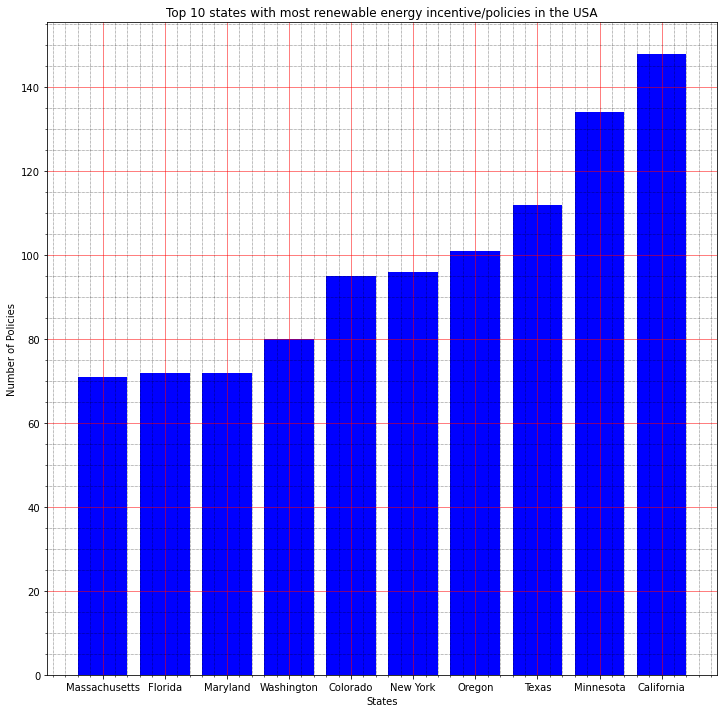

In [27]:
# Creating a bar plot for the top 10 states with most incentive/policies
x = topTen['State/US Territories']
y = topTen['NumberOfPolicies']

plt.subplots(figsize=(12,12)) # Setting plot size
plt.bar(x, y, color='blue') # Setting bar color to blue
plt.xlabel("States") # Setting x label
plt.ylabel("Number of Policies") # Setting y label
plt.title("Top 10 states with most renewable energy incentive/policies in the USA") # Setting title for the bar plot

plt.minorticks_on() # Turn on the grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red') # Customize the major grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') # Customize the minor grid

plt.show()

In [28]:
# Creating a dataframe to show the total number of policies by regions for the pie plot
statePoliciesDF['Region'].unique()
regionTotal = pd.DataFrame(regionGrouped.sum())
regionTotal

,NumberOfPolicies
Region,
Midwest,564
Northeast,441
South,666
US Territories,58
West,697


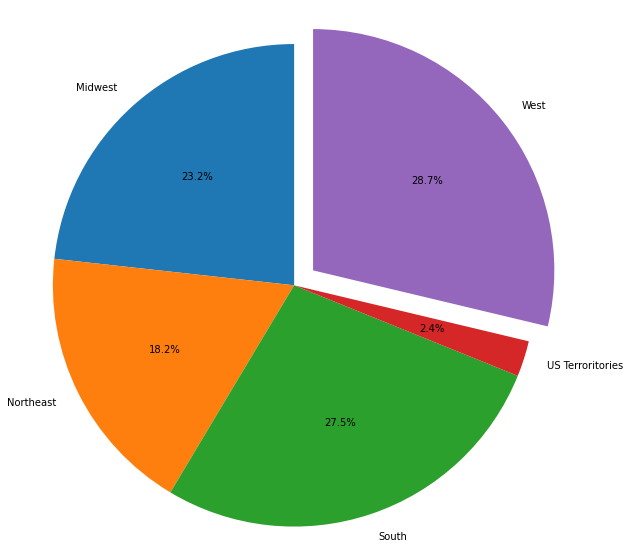

In [29]:
# Pie chart to show each region's policies percentage of the total numbers of policies
labels = 'Midwest','Northeast','South', 'US Terroritories', 'West' # Setting labels for pie slices
sizes = regionTotal['NumberOfPolicies'] # Setting sizes for slices
explode = (0, 0, 0, 0, 0.1) # Exploding last slice

fig1, ax1 = plt.subplots(figsize=(10,10)) # Setting the size of the pie plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90) # Plotting the pie
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

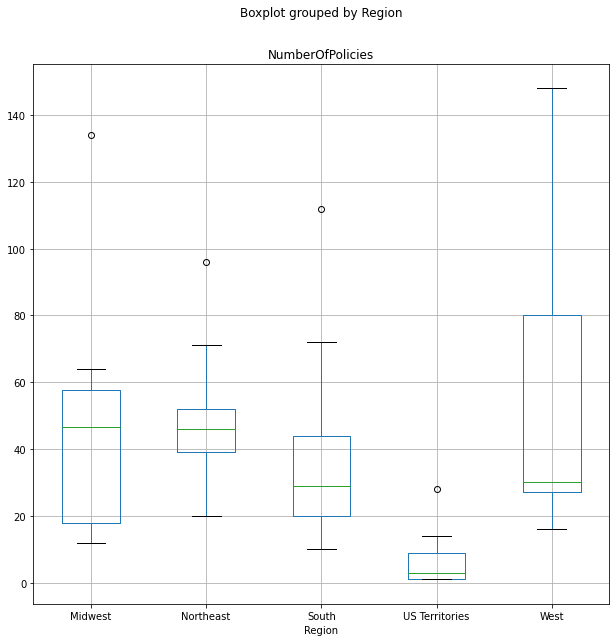

In [30]:
# Creating a boxplot to analyze each region
boxplot = statePoliciesDF.boxplot(column=['NumberOfPolicies'], by='Region', figsize=(10,10))

In [31]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import shapely.geometry as sgeom

In [32]:
# Creating a dictionary to show number of policies for each state
# NumPy datatypes for ndarray
data_type = [('Abr', 'S15'),('State/US Territories', 'S30'), ('NumberOfPolicies', int)] 
# NumPy creating ndarry
statePolicies1 = np.array(usMapList, dtype=data_type) 
# Pandas creating DataFrame and indexing objects
statePoliciesDataFrame = pd.DataFrame(statePolicies1) 
statePoliciesDataFrame['State/US Territories'] = statePoliciesDataFrame['State/US Territories'].str.decode(encoding = 'UTF-8')
statePoliciesDictionary = dict(zip(statePoliciesDataFrame['State/US Territories'], statePoliciesDataFrame['NumberOfPolicies']))
print(statePoliciesDictionary)

{'Alabama': 19, 'Alaska': 16, 'American Samoa': 1, 'Arizona': 58, 'Arkansas': 26, 'California': 148, 'Colorado': 95, 'Connecticut': 49, 'Delaware': 25, 'District of Columbia': 15, 'Federal': 28, 'Federated States of Micronesia': 1, 'Florida': 72, 'Georgia': 36, 'Guam': 3, 'Hawaii': 28, 'Idaho': 30, 'Illinois': 64, 'Indiana': 57, 'Iowa': 47, 'Kansas': 12, 'Kentucky': 39, 'Louisiana': 20, 'Maine': 20, 'Maryland': 72, 'Massachusetts': 71, 'Michigan': 45, 'Minnesota': 134, 'Mississippi': 20, 'Missouri': 60, 'Montana': 27, 'N. Mariana Islands': 3, 'Nebraska': 18, 'Nevada': 29, 'New Hampshire': 39, 'New Jersey': 46, 'New Mexico': 38, 'New York': 96, 'North Carolina': 68, 'North Dakota': 14, 'Ohio': 46, 'Oklahoma': 29, 'Oregon': 101, 'Palau': 1, 'Pennsylvania': 52, 'Puerto Rico': 14, 'Rhode Island': 28, 'South Carolina': 44, 'South Dakota': 17, 'Tennessee': 17, 'Texas': 112, 'Utah': 27, 'Vermont': 40, 'Virgin Islands': 7, 'Virginia': 42, 'Washington': 80, 'West Virginia': 10, 'Wisconsin': 50,

<ipython-input-33-22d9a9205932>:35: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
<ipython-input-33-22d9a9205932>:36: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


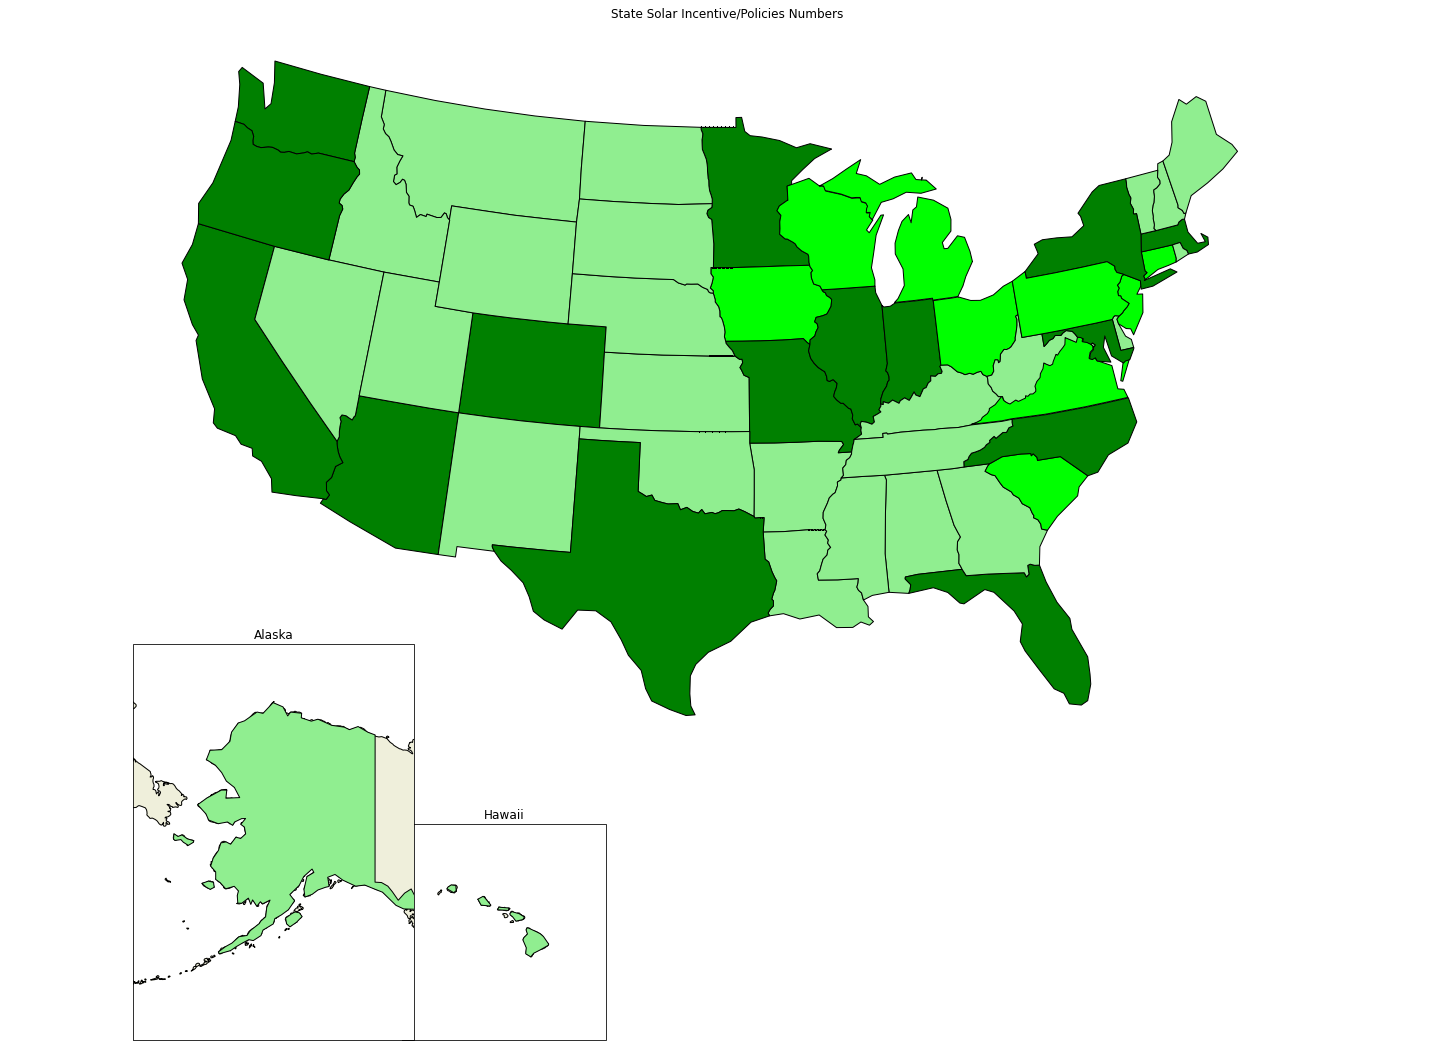

In [33]:
# Creating a us map to show the numbers of policies in each state 
def add_insetmap(axes_extent, map_extent, state_name, facecolor, edgecolor, geometry):
    # create new axes, set its projection
    use_projection = ccrs.Mercator()     # preserve shape well
    # use_projection = ccrs.PlateCarree()   # large distortion in E-W for Alaska
    geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
    sub_ax = plt.axes(axes_extent, projection=use_projection)  # normal units
    sub_ax.set_extent(map_extent, geodetic)  # map extents

    # add basic land, coastlines of the map
    # you may comment out if you don't need them
    sub_ax.add_feature(cartopy.feature.LAND)
    sub_ax.coastlines()

    sub_ax.set_title(state_name)

    # add map `geometry` here
    sub_ax.add_geometries([geometry], ccrs.PlateCarree(), \
                          facecolor=facecolor, edgecolor=edgecolor)

    # plot box around the map
    extent_box = sgeom.box(map_extent[0], map_extent[2], map_extent[1], map_extent[3])
    sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), color='none', linewidth=0.05)


fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Solar Incentive/Policies Numbers')

for state in shpreader.Reader(states_shp).records():


    edgecolor = 'black'

    try:
        # use the name of this state to get policies number
        state_num = statePoliciesDictionary[ state.attributes['name'] ]
    except:
        state_num = 0

    # simple scheme to assign color to each state
    if state_num < 41:
        facecolor = "lightgreen"
    elif state_num > 54.5:
        facecolor = "green"
    else:
        facecolor = "lime"

    # special handling for the 2 states
    # ---------------------------------
    if state.attributes['name'] in ("Alaska", "Hawaii"):
        # print("state.attributes['name']:", state.attributes['name'])

        state_name = state.attributes['name']

        # prep map settings
        # experiment with the numbers in both `_extents` for your best results
        if state_name == "Alaska":
            # (1) Alaska
            map_extent = (-178, -135, 46, 73)    # degrees: (lonmin,lonmax,latmin,latmax)
            axes_extent = (0.04, 0.06, 0.29, 0.275) # axes units: 0 to 1, (LLx,LLy,width,height)

        if state_name == "Hawaii":
            # (2) Hawii
            map_extent = (-162, -152, 15, 25)
            axes_extent = (0.27, 0.06, 0.15, 0.15)

        # add inset maps
        add_insetmap(axes_extent, map_extent, state_name, \
                     facecolor, \
                     edgecolor, \
                     state.geometry)

    # the other (conterminous) states go here
    else:
        # `state.geometry` is the polygon to plot
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

plt.show()

## References:
- http://www.dsireusa.org/ (data scraping for Part 1)
- http://www.tesla.com/support/incentives?redirect=no (data scraping for Part 1)
- PWSDS Ch1 to Ch9 (Web scraping for Part 1)
- PDA Ch4 and Ch5 (NumPy and Pandas for Part 2)
- PDA Ch6, Ch7, Ch8 (Data load, Data Prep, and Data Wrangling for Part 3)
- PDA Ch6 (Data load for Part 4)
- PDA Ch10 (Data aggregation and group operations for Part 5a)
- PDA Ch9 (Plotting and visualization for Part 5b)
- https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf (US census map to show the different regions for Part 5)
- https://stackoverflow.com/questions/55598249/showing-alaska-and-hawaii-in-cartopy-map (show data on US map for Part 5) 